<a href="https://colab.research.google.com/github/Garfield-Peerapol/traffic-accidents-analysis-2024/blob/main/traffic_accidents_analysis_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('Sarabun-Regular.ttf')
mpl.rc('font', family='Sarabun')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

mpl.__version__

url = 'https://raw.githubusercontent.com/mariaonz/traffic-accidents-analysis-2024/main/accident_file.csv'

# Use the 'raw' URL to access the CSV data directly
df = pd.read_csv(url)

In [2]:
df

,ปีที่เกิดเหตุ,วันที่เกิดเหตุ,เวลา,วันที่รายงาน,เวลาที่รายงาน,ACC_CODE,หน่วยงาน,สายทางหน่วยงาน,รหัสสายทาง,สายทาง,...,ยี่ห้อรถ,รหัสเพศ,เพศ,อายุ,รหัสจังหวัด,จังหวัดที่จดทะเบียน,หน่วยงานที่ซ้ำซ้อน,OBJ_CODE,OBJ_TYPE_CODE,รหัสลักษณะการเกิดอุบัติเหตุของหน่วยงาน
0,2024,01/01/2024,0:12:00,18/06/2024,14:23:00,9701543,กรมทางหลวง,ทางหลวง,4164,NaN,...,PROTON,1.0,ชาย,32.0,NaN,NaN,NaN,1.930700e+12,3.0,701
1,2024,01/01/2024,0:30:00,01/01/2024,12:13:00,8901889,กรมทางหลวง,ทางหลวง,106,ลี้ - ม่วงโตน,...,PROTON,1.0,ชาย,NaN,51.0,ลำพูน,NaN,NaN,3.0,705
2,2024,01/01/2024,0:30:00,02/01/2024,4:18:00,8902334,กรมทางหลวง,ทางหลวง,1143,น้ำคลาด - ปางหมิ่น,...,HONDA,2.0,หญิง,19.0,65.0,พิษณุโลก,NaN,NaN,3.0,701
3,2024,01/01/2024,0:30:00,01/01/2024,11:40:00,8902375,กรมทางหลวง,ทางหลวง,3390,หนองรี - บ่อยาง,...,YAMAHA,1.0,ชาย,50.0,NaN,NaN,NaN,NaN,3.0,5
4,2024,01/01/2024,0:30:00,02/01/2024,5:10:00,8902450,กรมทางหลวง,ทางหลวง,4021,เมืองภูเก็ต - ห้าแยกฉลอง,...,PROTON,2.0,หญิง,41.0,NaN,NaN,NaN,NaN,3.0,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21811,2024,31/12/2024,22:00:00,01/01/2025,18:37:00,9966216,กรมทางหลวง,ทางหลวง,215,NaN,...,TOYOTA,1.0,ชาย,NaN,45.0,ร้อยเอ็ด,NaN,NaN,11.0,708
21812,2024,31/12/2024,22:20:00,01/01/2025,3:48:00,9965756,กรมทางหลวง,ทางหลวง,1,ดงจำปา - แยกร.พ.อานันทมหิดล,...,PROTON,1.0,ชาย,NaN,16.0,ลพบุรี,NaN,NaN,3.0,301
21813,2024,31/12/2024,22:40:00,01/01/2025,4:06:00,9965766,กรมทางหลวง,ทางหลวง,33,สุพรรณบุรี - นาคู,...,ISUZU,1.0,ชาย,NaN,16.0,ลพบุรี,NaN,NaN,11.0,703
21814,2024,31/12/2024,22:40:00,17/01/2025,10:34:00,9995783,กรมทางหลวงชนบท,ทางหลวงชนบท,สห.3026,แยกทางหลวงหมายเลข 311 (กม.ที่ 27+960) - แยกทาง...,...,TOYOTA,1.0,ชาย,NaN,10.0,กรุงเทพมหานคร,NaN,NaN,7.0,802


In [3]:
df.columns

Index(['ปีที่เกิดเหตุ', 'วันที่เกิดเหตุ', 'เวลา', 'วันที่รายงาน',
       'เวลาที่รายงาน', 'ACC_CODE', 'หน่วยงาน', 'สายทางหน่วยงาน', 'รหัสสายทาง',
       'สายทาง', 'ก.ม.', 'จังหวัด', 'ภาค', 'รถคันที่ 1', 'ทะเบียนรถ',
       'บริเวณที่เกิดเหตุ/ลักษณะทาง', 'บริเวณที่เกิดเหตุอื่น',
       'มูลเหตุสันนิษฐาน', 'มูลเหตุสันนิษฐานอื่นๆ', 'ลักษณะการเกิดอุบัติเหตุ',
       'ลักษณะการเกิดอุบัติเหตุอื่นๆ', 'สภาพอากาศ', 'LATITUDE', 'LONGITUDE',
       'OBJ_MODEL', 'DRIVER_SAFETY', 'OBJ_BRAND_CODE',
       'จำนวนรถที่เกิดเหตุ (รวมคันที่ 1)',
       'จำนวนที่เกิดเหตุทั้งหมด (รวมคนเดินเท้า)', 'รถจักรยานยนต์',
       'รถสามล้อเครื่อง', 'รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ', 'รถตู้',
       'รถปิคอัพโดยสาร', 'รถโดยสารมากกว่า 4 ล้อ', 'รถปิคอัพบรรทุก 4 ล้อ',
       'รถบรรทุก 6 ล้อ', 'รถบรรทุกมากกว่า 6 ล้อ ไม่เกิน 10 ล้อ',
       'รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง)', 'รถอีแต๋น', 'อื่นๆ', 'คนเดินเท้า',
       'จำนวนผู้เสียชีวิต', 'จำนวนผู้บาดเจ็บสาหัส', 'จำนวนผู้บาดเจ็บเล็กน้อย',
       'รวมจำนวนผู้บาดเจ็บ', 

In [5]:
df2=df[['วันที่เกิดเหตุ', 'เวลา', 'วันที่รายงาน',
       'เวลาที่รายงาน', 'ACC_CODE',  'จังหวัด', 'ภาค', 'รถคันที่ 1', 'ทะเบียนรถ',
       'บริเวณที่เกิดเหตุ/ลักษณะทาง', 'บริเวณที่เกิดเหตุอื่น',
       'มูลเหตุสันนิษฐาน', 'มูลเหตุสันนิษฐานอื่นๆ', 'ลักษณะการเกิดอุบัติเหตุ',
       'ลักษณะการเกิดอุบัติเหตุอื่นๆ', 'สภาพอากาศ', 'LATITUDE', 'LONGITUDE',

       'จำนวนรถที่เกิดเหตุ (รวมคันที่ 1)',
       'จำนวนที่เกิดเหตุทั้งหมด (รวมคนเดินเท้า)', 'รถจักรยานยนต์',
       'รถสามล้อเครื่อง', 'รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ', 'รถตู้',
       'รถปิคอัพโดยสาร', 'รถโดยสารมากกว่า 4 ล้อ', 'รถปิคอัพบรรทุก 4 ล้อ',
       'รถบรรทุก 6 ล้อ', 'รถบรรทุกมากกว่า 6 ล้อ ไม่เกิน 10 ล้อ',
       'รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง)', 'รถอีแต๋น', 'อื่นๆ', 'คนเดินเท้า',
       'จำนวนผู้เสียชีวิต', 'จำนวนผู้บาดเจ็บสาหัส', 'จำนวนผู้บาดเจ็บเล็กน้อย',
       'รวมจำนวนผู้บาดเจ็บ',
       'OBJ_TYPE_CODE', 'รหัสลักษณะการเกิดอุบัติเหตุของหน่วยงาน']]

## **PLOT1 จำนวนอุบัติเหตุ ผู้ได้รับบาดเจ็บ ผู้เสียชีวิตแยกตามภาค แยกตามจังหวัด**

Text(0.5, 1.0, 'อุบัติเหตุทางถนนแยกตามภูมิภาค พ.ศ.2567 ')

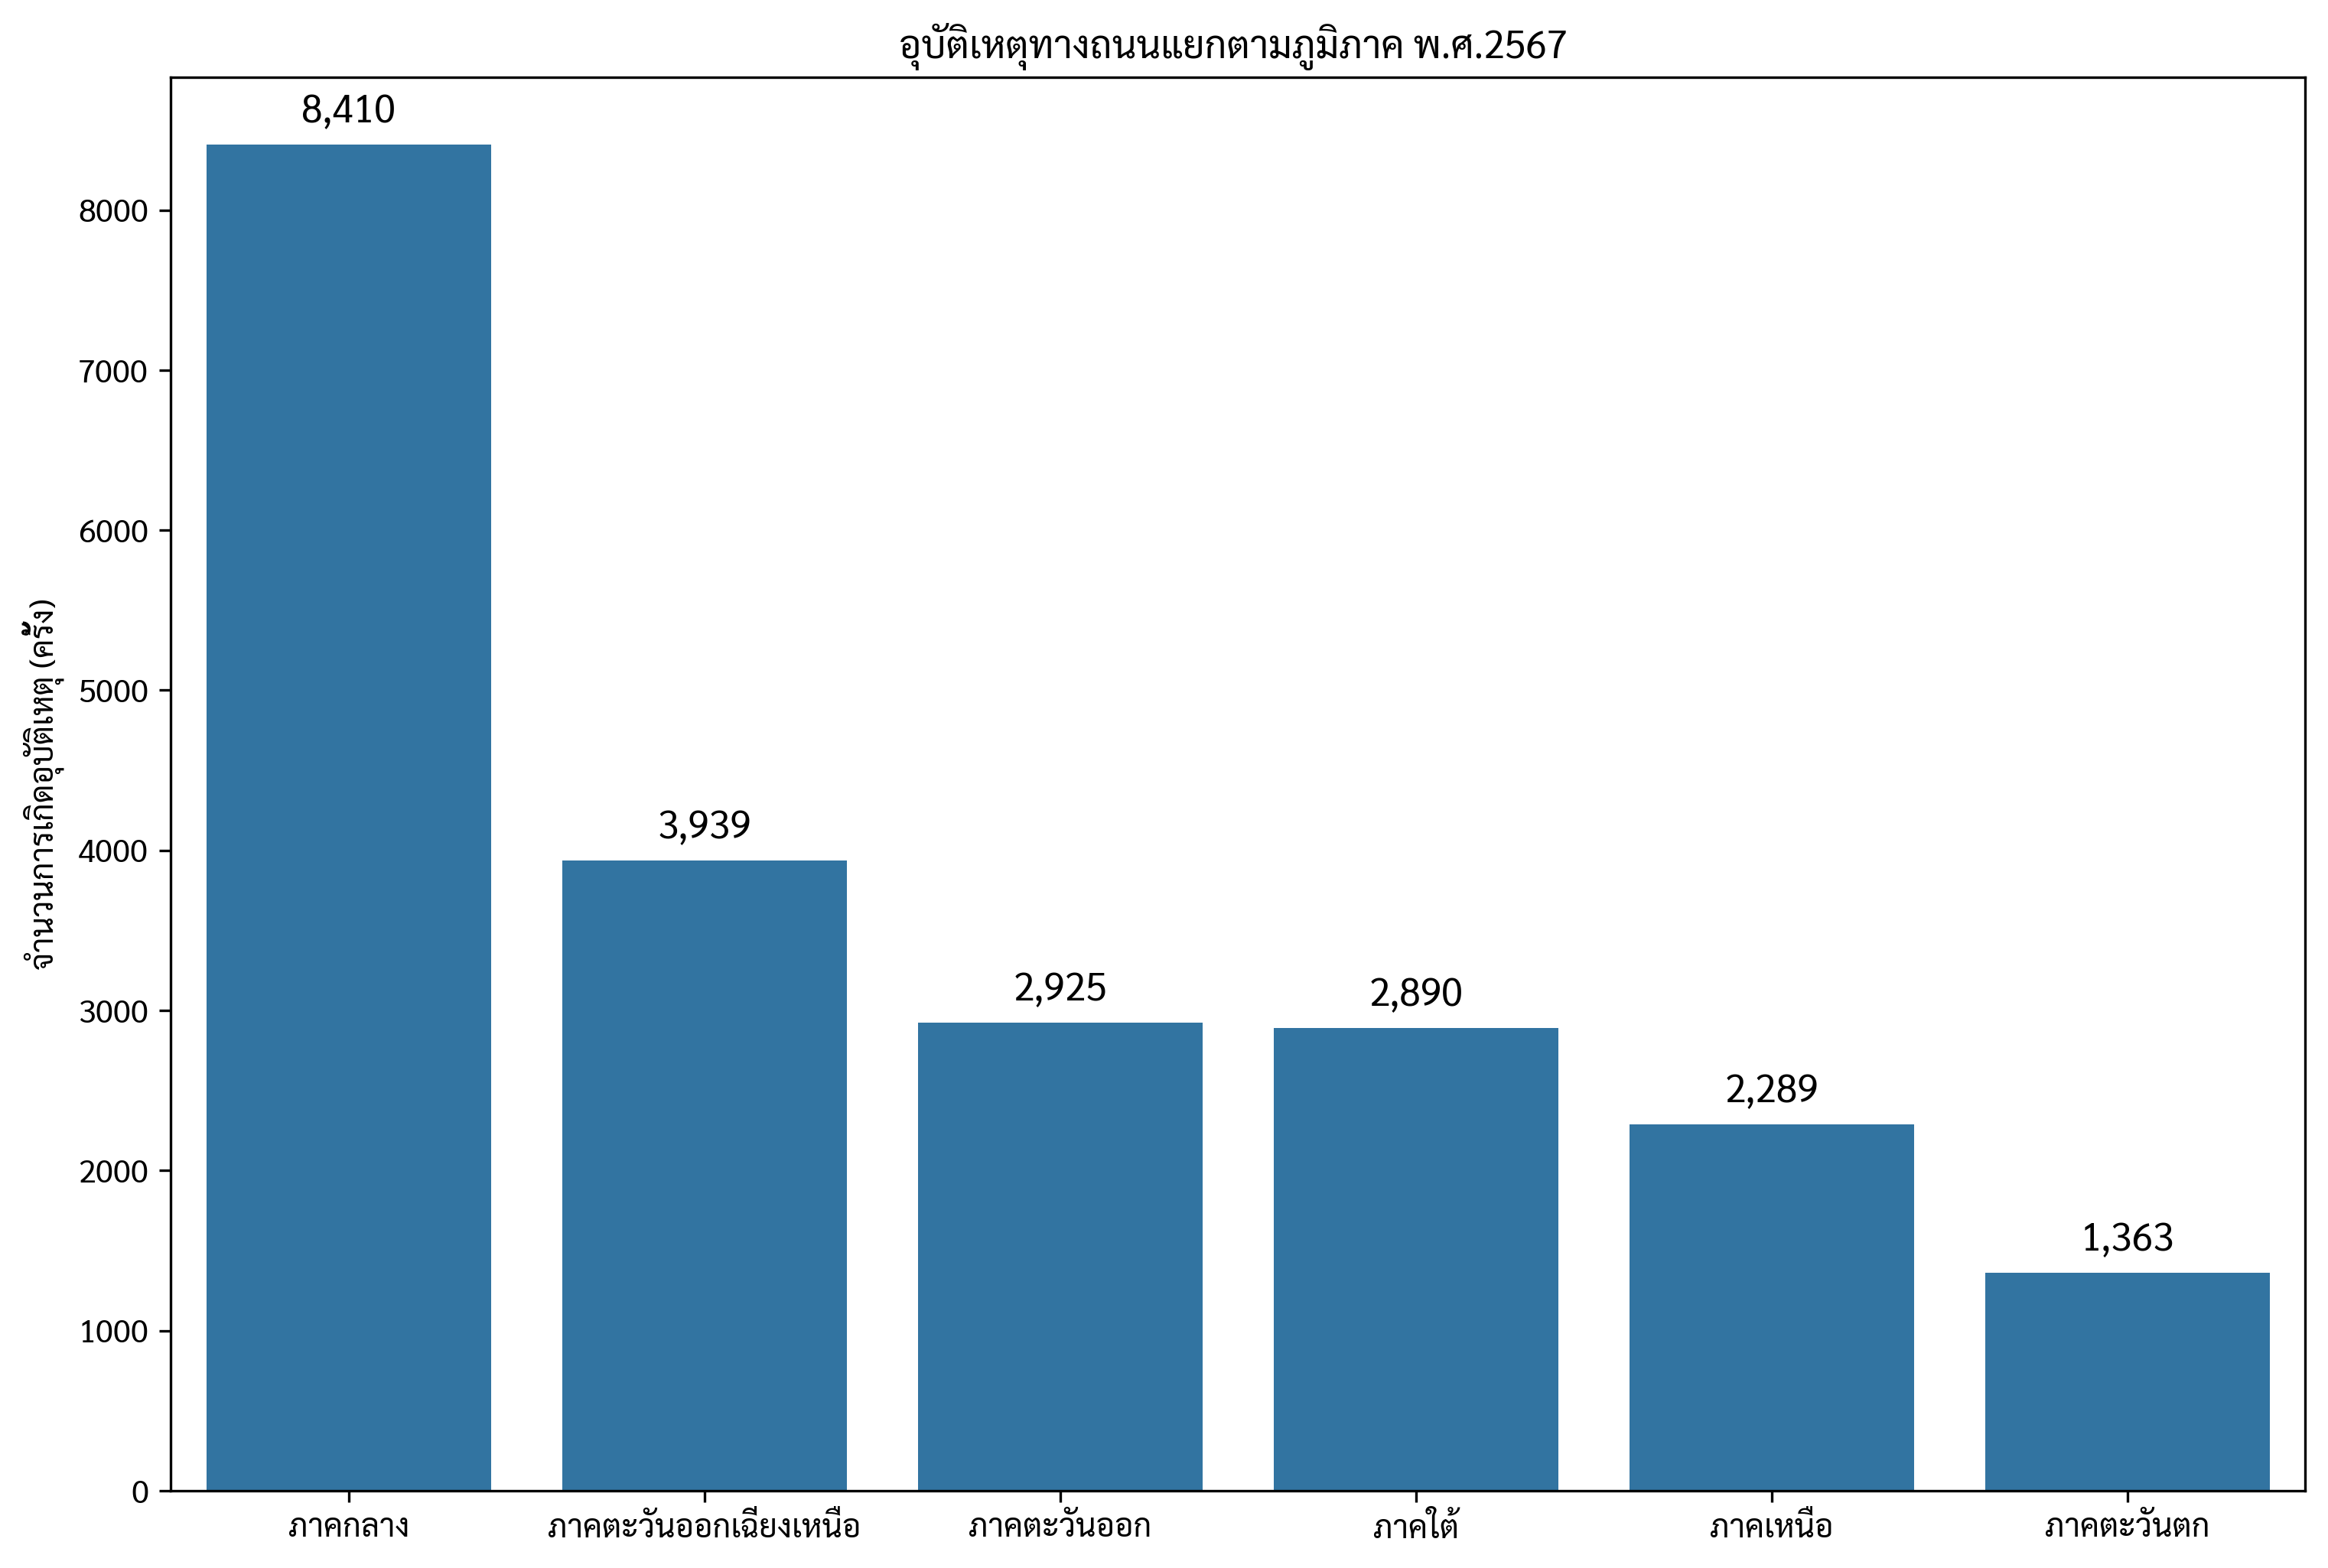

In [59]:
t1_region_accident=df.pivot_table(index='ภาค',values='ACC_CODE',aggfunc='count').sort_values(by='ACC_CODE',ascending=False)
t1_region_accident
plt.figure(figsize=(12,8),dpi=300)
graph1=sns.barplot(x=t1_region_accident.index, y='ACC_CODE',data=t1_region_accident)

for p in graph1.patches:
    graph1.annotate(f'{p.get_height():,.0f}',  # แสดงค่า y
                (p.get_x() + p.get_width() / 2., p.get_height()),  # ตำแหน่งที่จะวางข้อความ
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

graph1.set(xlabel=None,ylabel='จำนวนการเกิดอุบัติเหตุ (ครั้ง)')

plt.title('อุบัติเหตุทางถนนแยกตามภูมิภาค พ.ศ.2567 ')

In [56]:
region_data = df.groupby('ภาค').agg(
    ACC_CODE_Count=('ACC_CODE', 'count'),
    Total_Injured=('รวมจำนวนผู้บาดเจ็บ', 'sum'),
    Total_Deaths=('จำนวนผู้เสียชีวิต', 'sum')
).sort_values(by='ACC_CODE_Count', ascending=False)

# Reset index to make 'ภาค' a column
region_data = region_data.reset_index()

# Melt the DataFrame for easier plotting with Seaborn
melted_data = pd.melt(region_data, id_vars=['ภาค'],
                      value_vars=['ACC_CODE_Count', 'Total_Injured', 'Total_Deaths'],
                      var_name='Category', value_name='Value')

melted_data

,ภาค,Category,Value
0,ภาคกลาง,ACC_CODE_Count,8410
1,ภาคตะวันออกเฉียงเหนือ,ACC_CODE_Count,3939
2,ภาคตะวันออก,ACC_CODE_Count,2925
3,ภาคใต้,ACC_CODE_Count,2890
4,ภาคเหนือ,ACC_CODE_Count,2289
5,ภาคตะวันตก,ACC_CODE_Count,1363
6,ภาคกลาง,Total_Injured,6384
7,ภาคตะวันออกเฉียงเหนือ,Total_Injured,4014
8,ภาคตะวันออก,Total_Injured,2221
9,ภาคใต้,Total_Injured,2966


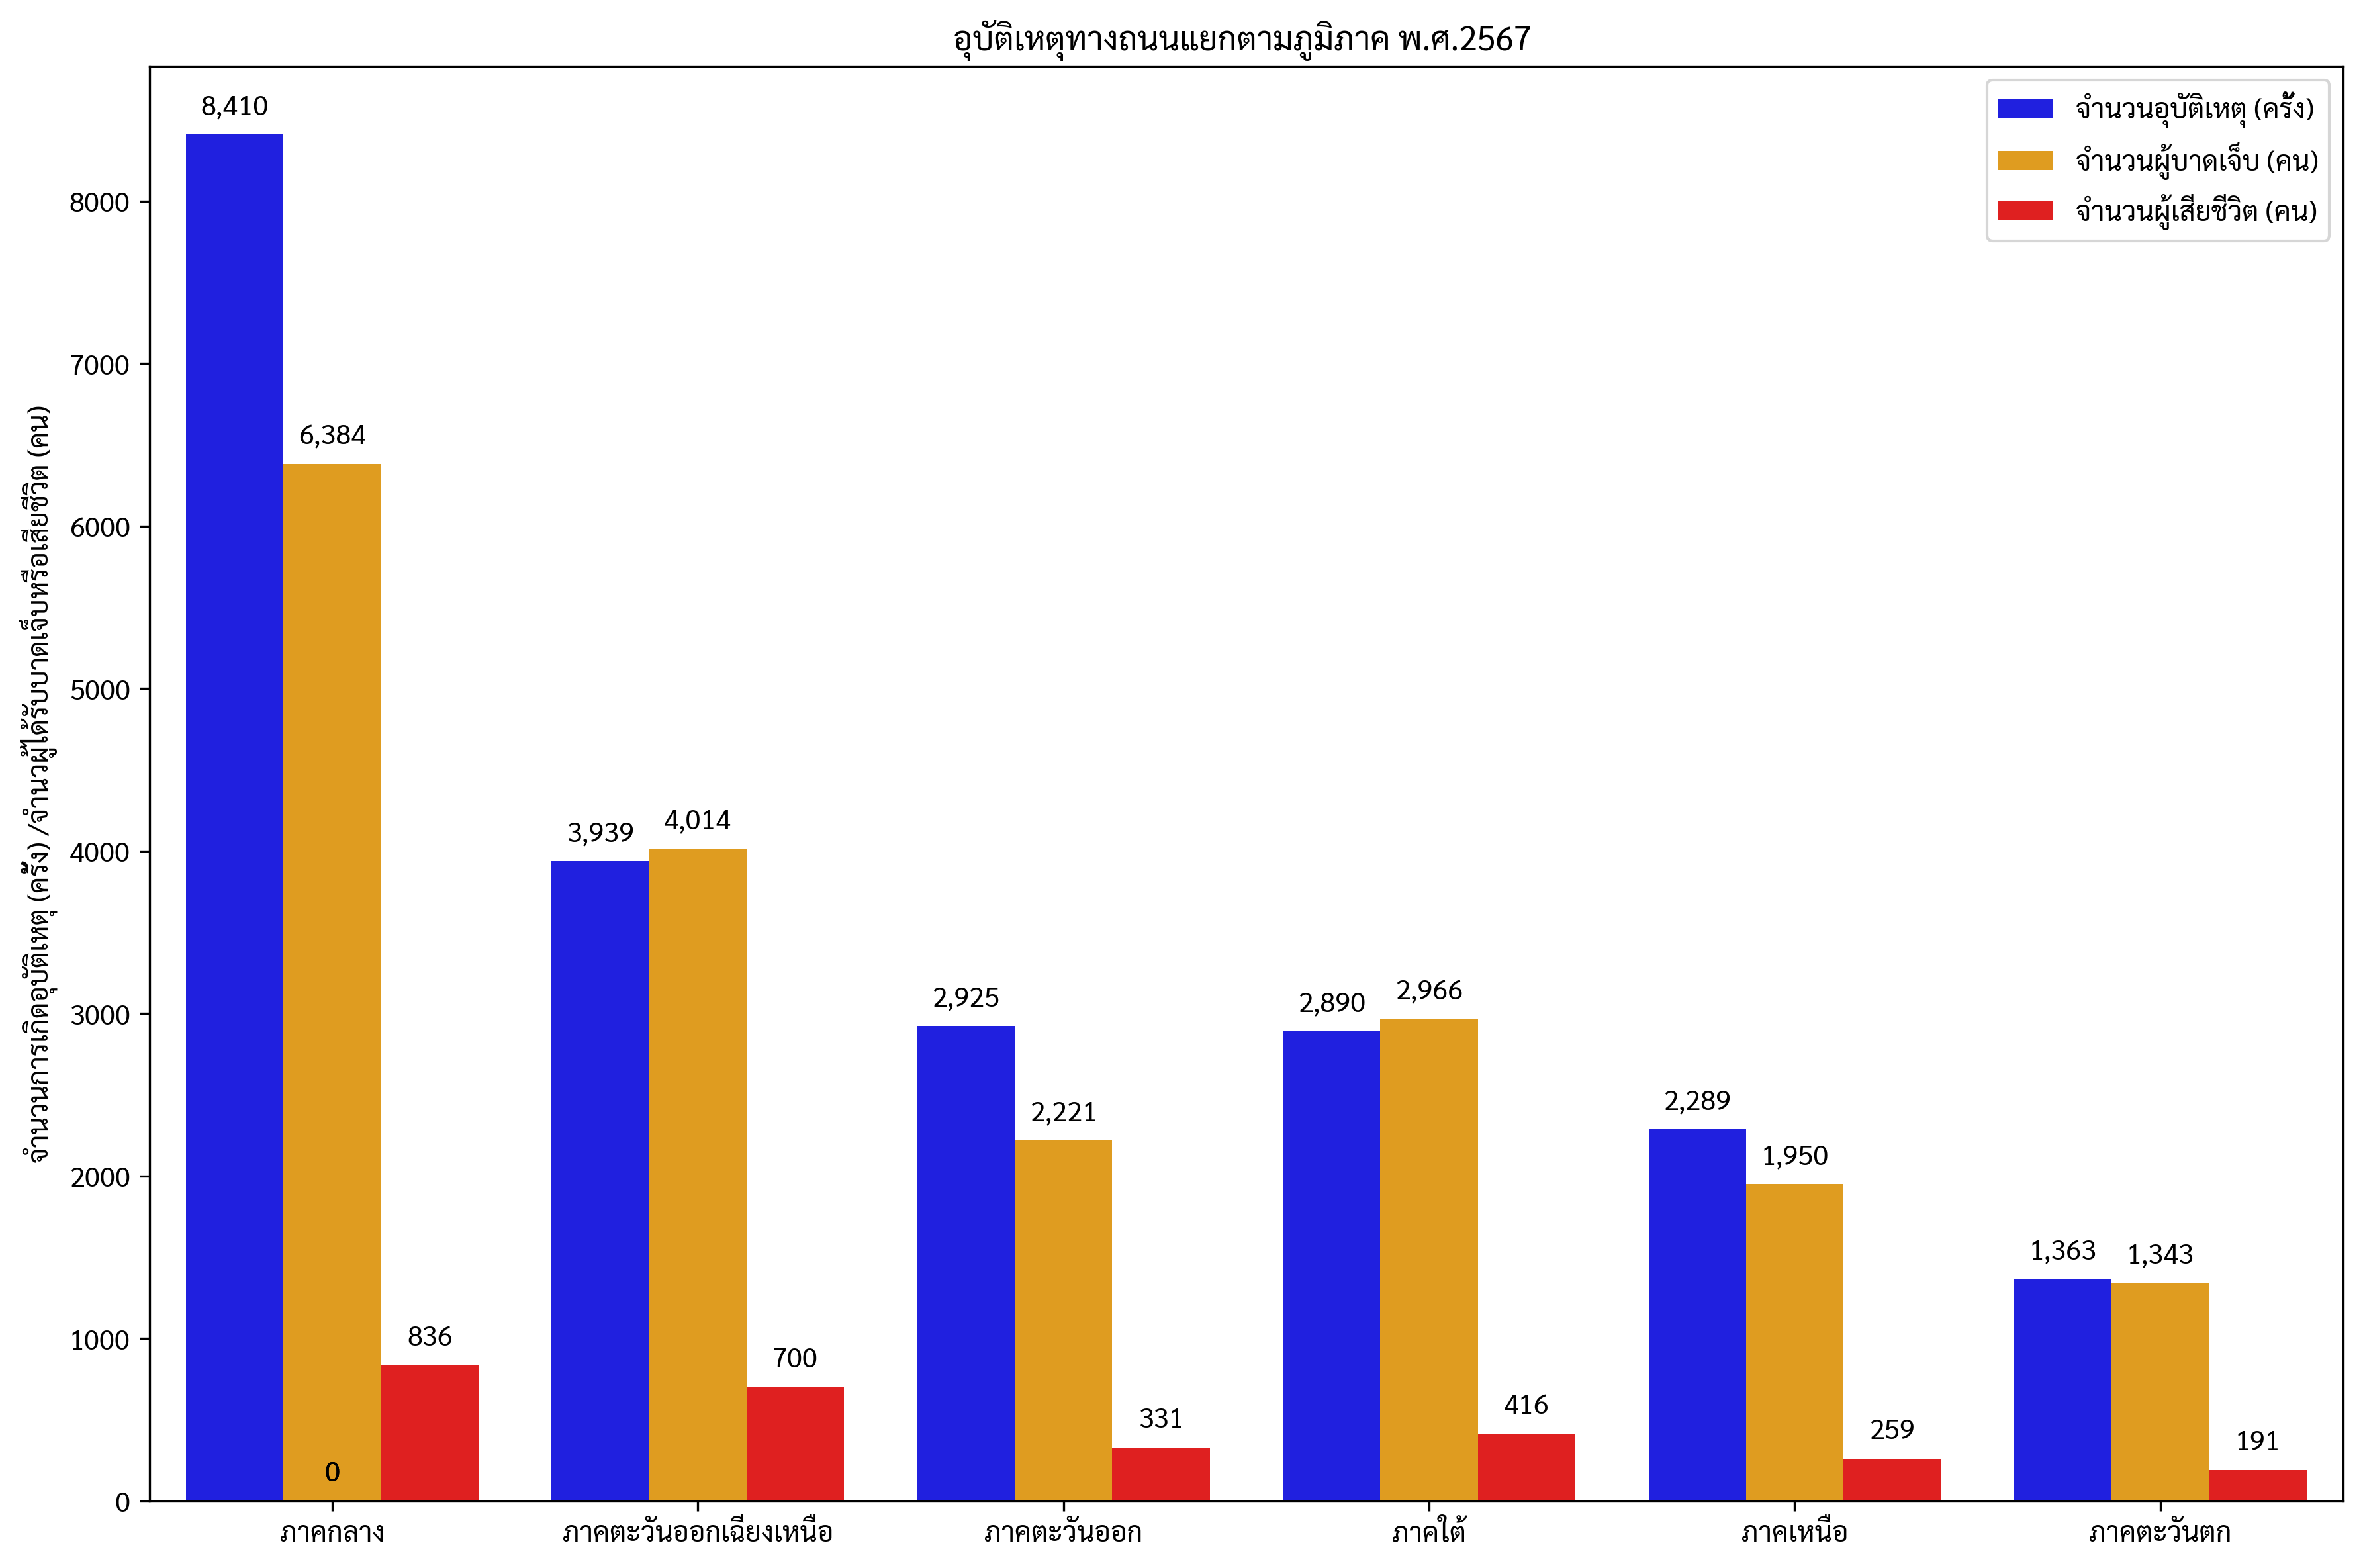

In [121]:
#ใช้ กราฟรวมจำนวนการเกิดอุบัติเหตุ ผู้บาดเจ็บและเสียชีวิตแยกตามภาค
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd

# Create the pivot table with the desired columns
region_data = df.groupby('ภาค').agg(
    ACC_CODE_Count=('ACC_CODE', 'count'),
    Total_Injured=('รวมจำนวนผู้บาดเจ็บ', 'sum'),
    Total_Deaths=('จำนวนผู้เสียชีวิต', 'sum')
).sort_values(by='ACC_CODE_Count', ascending=False)

# Reset index to make 'ภาค' a column
region_data = region_data.reset_index()

# Melt the DataFrame for easier plotting with Seaborn
melted_data = pd.melt(region_data, id_vars=['ภาค'],
                      value_vars=['ACC_CODE_Count', 'Total_Injured', 'Total_Deaths'],
                      var_name='Category', value_name='Value')

melted_data['Category'] = melted_data['Category'].replace({
    'ACC_CODE_Count': 'จำนวนอุบัติเหตุ (ครั้ง)',
    'Total_Injured': 'จำนวนผู้บาดเจ็บ (คน)',
    'Total_Deaths': 'จำนวนผู้เสียชีวิต (คน)'
})

# Create the bar plot using Seaborn
plt.figure(figsize=(12,8),dpi=300)
graph2 = sns.barplot(x='ภาค', y='Value', hue='Category', data=melted_data,
                     palette={'จำนวนอุบัติเหตุ (ครั้ง)': 'blue',
                              'จำนวนผู้บาดเจ็บ (คน)': 'orange',
                              'จำนวนผู้เสียชีวิต (คน)': 'red'})


for p in graph2.patches:
    graph2.annotate(f'{p.get_height():,.0f}',  # แสดงค่า y
                (p.get_x() + p.get_width() / 2., p.get_height()),  # ตำแหน่งที่จะวางข้อความ
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')


plt.title('อุบัติเหตุทางถนนแยกตามภูมิภาค พ.ศ.2567 ')
#plt.xlabel('Region')
plt.xlabel(None)
plt.ylabel('จำนวนการเกิดอุบัติเหตุ (ครั้ง) /จำนวผู้ได้รับบาดเจ็บหรือเสียชีวิต (คน)')
plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels for better readability
graph2.legend(title=None)
plt.tight_layout()
plt.show()

<ipython-input-133-525fdd4b5ea5>:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
<ipython-input-133-525fdd4b5ea5>:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
<ipython-input-133-525fdd4b5ea5>:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
<ipython-input-133-525fdd4b5ea5>:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].

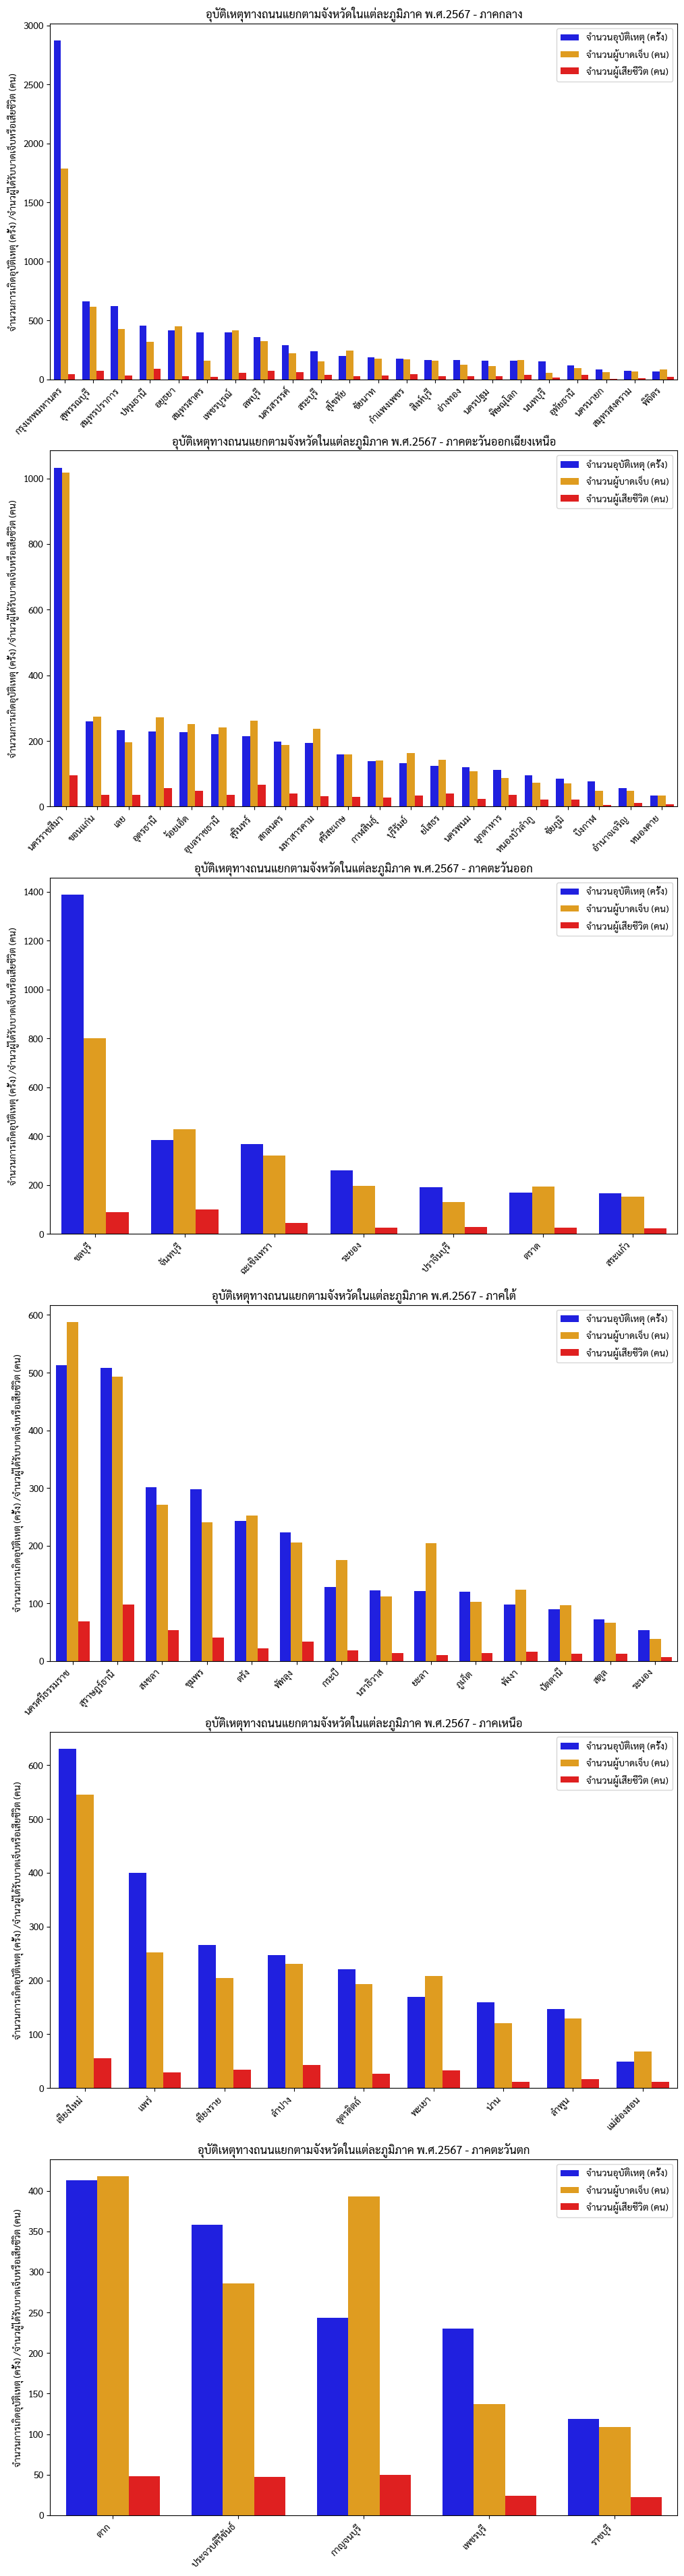

In [133]:
#ใช้ กราฟรวมจำนวนการเกิดอุบัติเหตุ ผู้บาดเจ็บและเสียชีวิตแยกตามจังหวัดในแต่ละภาค
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd

# 1. Get unique regions

regions = df.groupby('ภาค').agg(
    ACC_CODE_Count=('ACC_CODE', 'count'),
    Total_Injured=('รวมจำนวนผู้บาดเจ็บ', 'sum'),
    Total_Deaths=('จำนวนผู้เสียชีวิต', 'sum')
).sort_values(by='ACC_CODE_Count', ascending=False).index.tolist()

# 2. Create subplots
fig, axes = plt.subplots(len(regions), 1, figsize=(12, 8 * len(regions)), sharex=False)

# 3. Iterate through regions and plot
for i, region in enumerate(regions):
    region_data = df[df['ภาค'] == region]

    # Create pivot table with Total Injured and Total Deaths
    t2_region_accident = region_data.groupby('จังหวัด').agg(
        ACC_CODE_Count=('ACC_CODE', 'count'),
        Total_Injured=('รวมจำนวนผู้บาดเจ็บ', 'sum'),
        Total_Deaths=('จำนวนผู้เสียชีวิต', 'sum')
    )

    # Sort by ACC_CODE_Count in descending order
    t2_region_accident = t2_region_accident.sort_values(by='ACC_CODE_Count', ascending=False)

    # Reset index to make 'จังหวัด' a column
    t2_region_accident = t2_region_accident.reset_index()

    # Melt the DataFrame for easier plotting with Seaborn
    melted_data = pd.melt(t2_region_accident, id_vars=['จังหวัด'],
                          value_vars=['ACC_CODE_Count', 'Total_Injured', 'Total_Deaths'],
                          var_name='Category', value_name='Value')

    melted_data['Category'] = melted_data['Category'].replace({
    'ACC_CODE_Count': 'จำนวนอุบัติเหตุ (ครั้ง)',
    'Total_Injured': 'จำนวนผู้บาดเจ็บ (คน)',
    'Total_Deaths': 'จำนวนผู้เสียชีวิต (คน)'
    })



    # Create the bar plot using Seaborn
    a=sns.barplot(x='จังหวัด', y='Value', hue='Category', data=melted_data, ax=axes[i],palette={'จำนวนอุบัติเหตุ (ครั้ง)': 'blue',
                                'จำนวนผู้บาดเจ็บ (คน)': 'orange',
                                'จำนวนผู้เสียชีวิต (คน)': 'red'},width=0.75).legend(title=None)

    axes[i].set_title(f'อุบัติเหตุทางถนนแยกตามจังหวัดในแต่ละภูมิภาค พ.ศ.2567 - {region}')  # Set title for each subplot
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
    axes[i].set_xlabel('')
    axes[i].set_ylabel('จำนวนการเกิดอุบัติเหตุ (ครั้ง) /จำนวผู้ได้รับบาดเจ็บหรือเสียชีวิต (คน)')

#plt.tight_layout()
plt.show()


## **PLOT2 จำนวนการเกิดอุบัติเหตุแยกตามช่วงเวลาใน 1 วัน**

<ipython-input-10-4cc78f756021>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['เวลา'] = pd.to_datetime(df['เวลา'])


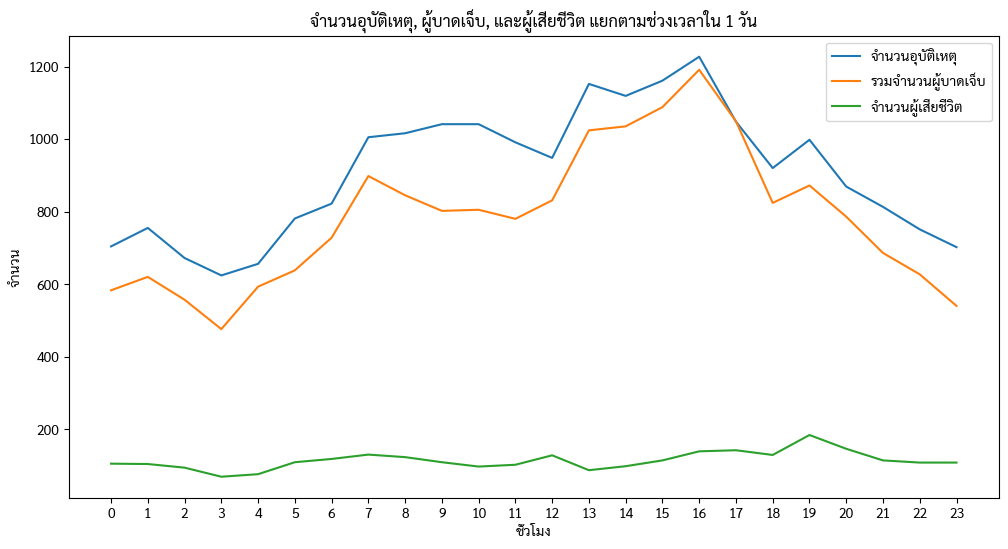

In [ ]:
# prompt: plot กราฟที่มี index ตามช่วงเวลาราย ชม ในคอลัมน์'เวลา' โดยมีค่า count'ACC_CODE' sum "รวมจำนวนผู้บาดเจ็บ' sum'จำนวนผู้เสียชีวิต'

# Assuming 'df' is your DataFrame and 'เวลา' column contains time information.
# Convert 'เวลา' to datetime objects if it's not already.
df['เวลา'] = pd.to_datetime(df['เวลา'])

# Extract hour from the 'เวลา' column
df['Hour'] = df['เวลา'].dt.hour

# Group by hour and calculate counts for ACC_CODE, sum of 'รวมจำนวนผู้บาดเจ็บ', and sum of 'จำนวนผู้เสียชีวิต'
hourly_data = df.groupby('Hour').agg({
    'ACC_CODE': 'count',
    'รวมจำนวนผู้บาดเจ็บ': 'sum',
    'จำนวนผู้เสียชีวิต': 'sum'
})

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_data.index, hourly_data['ACC_CODE'], label='จำนวนอุบัติเหตุ')
plt.plot(hourly_data.index, hourly_data['รวมจำนวนผู้บาดเจ็บ'], label='รวมจำนวนผู้บาดเจ็บ')
plt.plot(hourly_data.index, hourly_data['จำนวนผู้เสียชีวิต'], label='จำนวนผู้เสียชีวิต')
plt.xlabel('ชั่วโมง')
plt.ylabel('จำนวน')
plt.title('จำนวนอุบัติเหตุ, ผู้บาดเจ็บ, และผู้เสียชีวิต แยกตามช่วงเวลาใน 1 วัน')
plt.legend()
plt.xticks(range(24))  # Show ticks for each hour
plt.grid(False)
plt.show()


ValueError: The number of FixedLocator locations (24), usually from a call to set_ticks, does not match the number of labels (12).

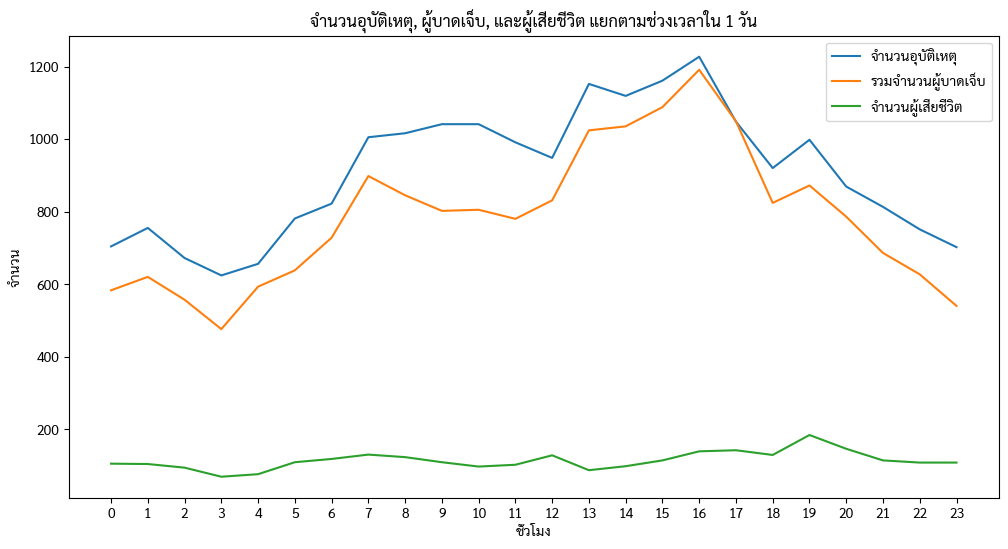

In [ ]:
# prompt: เปลี่ยน label 0 - 23 axis X to thai month label

# ## **PLOT2 จำนวนการเกิดอุบัติเหตุแยกตามช่วงเวลาใน 1 วัน**

# Assuming 'df' is your DataFrame and 'เวลา' column contains time information.
# Convert 'เวลา' to datetime objects if it's not already.
df['เวลา'] = pd.to_datetime(df['เวลา'])

# Extract hour from the 'เวลา' column
df['Hour'] = df['เวลา'].dt.hour

# Group by hour and calculate counts for ACC_CODE, sum of 'รวมจำนวนผู้บาดเจ็บ', and sum of 'จำนวนผู้เสียชีวิต'
hourly_data = df.groupby('Hour').agg({
    'ACC_CODE': 'count',
    'รวมจำนวนผู้บาดเจ็บ': 'sum',
    'จำนวนผู้เสียชีวิต': 'sum'
})

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_data.index, hourly_data['ACC_CODE'], label='จำนวนอุบัติเหตุ')
plt.plot(hourly_data.index, hourly_data['รวมจำนวนผู้บาดเจ็บ'], label='รวมจำนวนผู้บาดเจ็บ')
plt.plot(hourly_data.index, hourly_data['จำนวนผู้เสียชีวิต'], label='จำนวนผู้เสียชีวิต')
plt.xlabel('ชั่วโมง')
plt.ylabel('จำนวน')
plt.title('จำนวนอุบัติเหตุ, ผู้บาดเจ็บ, และผู้เสียชีวิต แยกตามช่วงเวลาใน 1 วัน')
plt.legend()

thai_months = ['ม.ค.', 'ก.พ.', 'มี.ค.', 'เม.ย.', 'พ.ค.', 'มิ.ย.', 'ก.ค.', 'ส.ค.', 'ก.ย.', 'ต.ค.', 'พ.ย.', 'ธ.ค.']

plt.xticks(range(24), thai_months)  # Replace with Thai month labels
plt.grid(False)
plt.show()


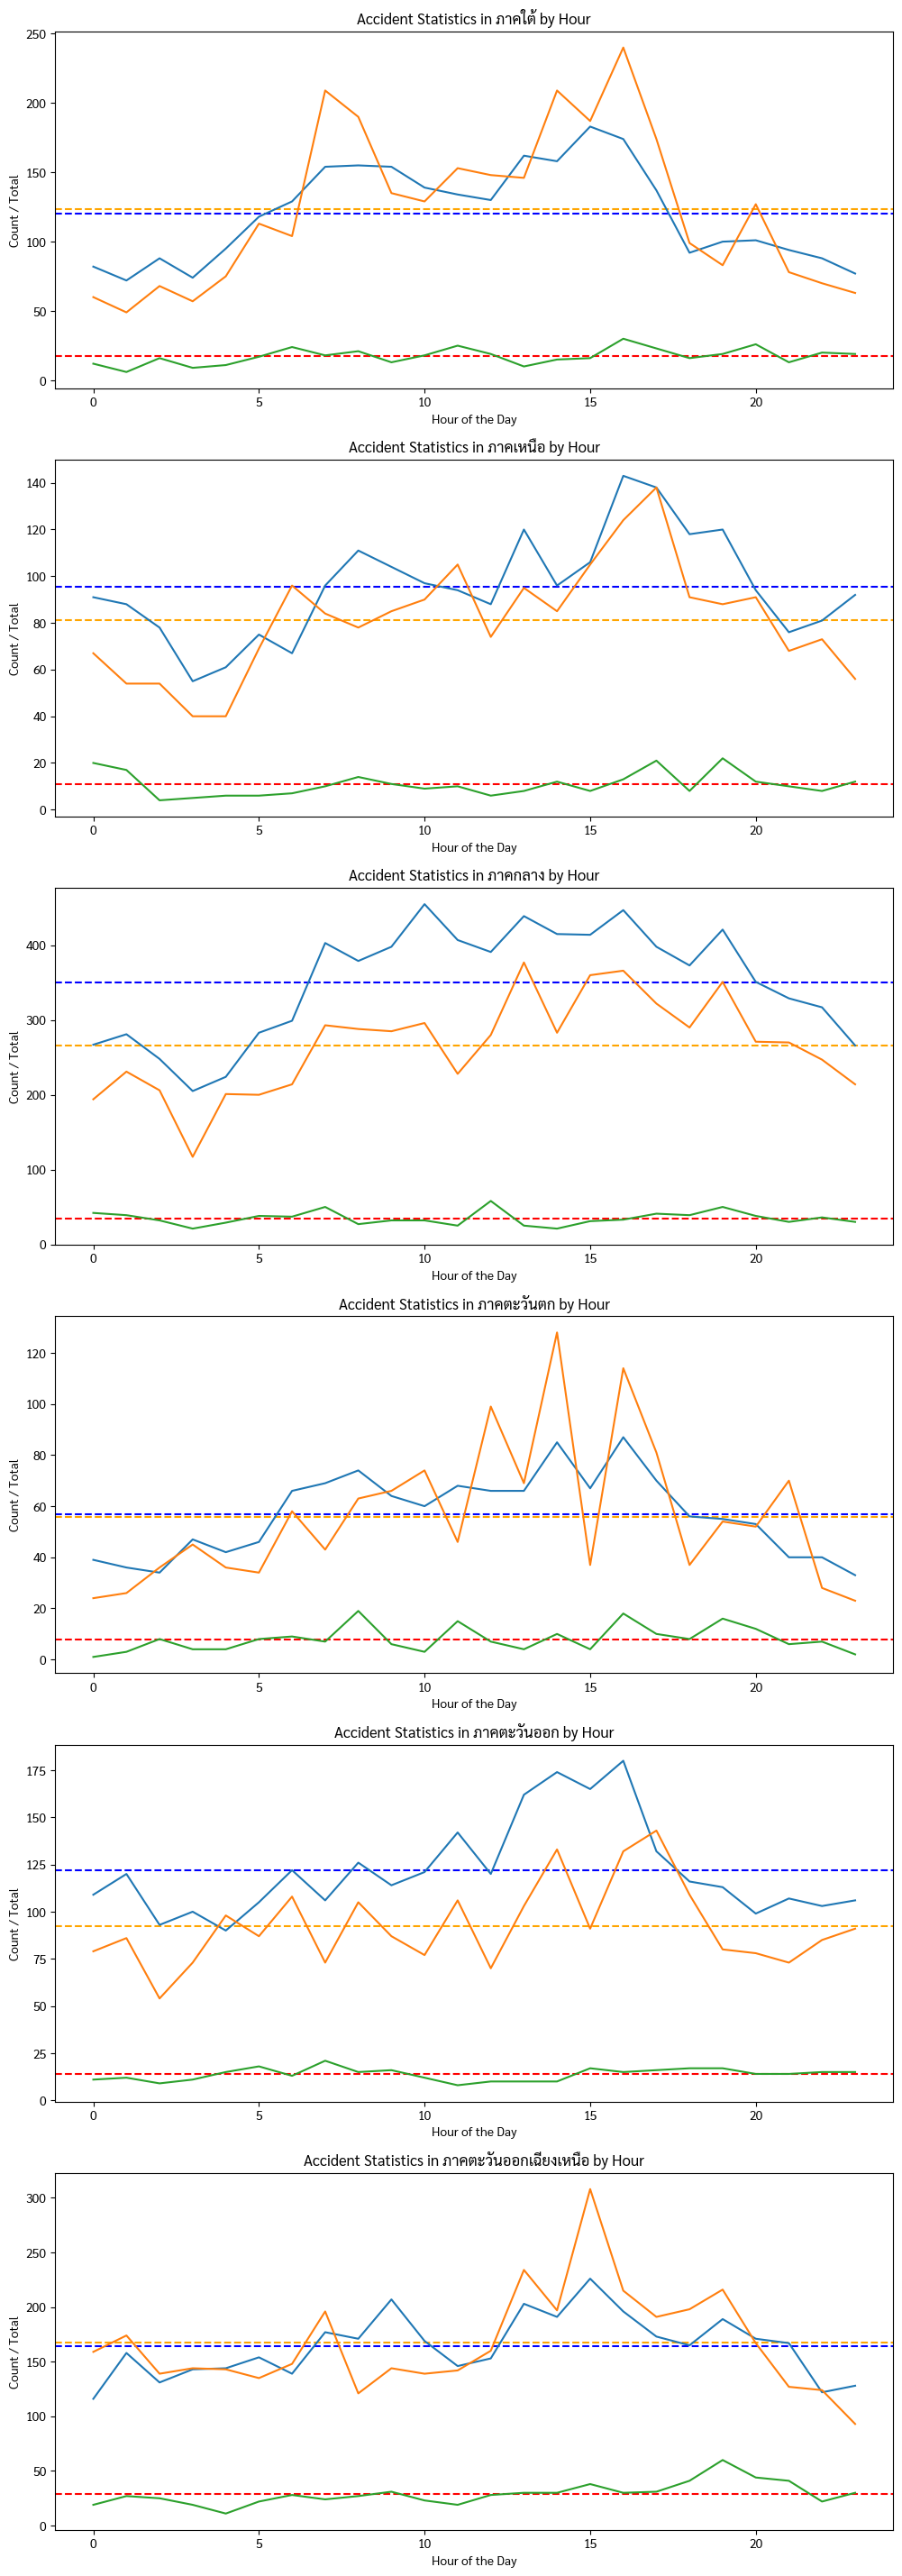

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your DataFrame

# 1. Convert 'เวลา' to datetime objects and extract hour
df['เวลา'] = pd.to_datetime(df['เวลา'], errors='coerce')  # Handle potential errors in datetime conversion
df['Hour'] = df['เวลา'].dt.hour

# 2. Get unique regions
regions = df['ภาค'].unique()

# 3. Create subplots
fig, axes = plt.subplots(len(regions), 1, figsize=(12, 6 * len(regions)), sharex=False)

# 4. Iterate through regions and plot
for i, region in enumerate(regions):
    region_data = df[df['ภาค'] == region]

    # Group by hour and calculate metrics
    hourly_data = region_data.groupby('Hour').agg(
        ACC_CODE_Count=('ACC_CODE', 'count'),
        Total_Injured=('รวมจำนวนผู้บาดเจ็บ', 'sum'),
        Total_Deaths=('จำนวนผู้เสียชีวิต', 'sum')
    )

     # Calculate average values
    avg_acc_count = hourly_data['ACC_CODE_Count'].mean()
    avg_total_injured = hourly_data['Total_Injured'].mean()
    avg_total_deaths = hourly_data['Total_Deaths'].mean()

    # Add horizontal lines for averages
    axes[i].axhline(avg_acc_count, color='blue', linestyle='--', label='Avg Accident Count')
    axes[i].axhline(avg_total_injured, color='orange', linestyle='--', label='Avg Total Injured')
    axes[i].axhline(avg_total_deaths, color='red', linestyle='--', label='Avg Total Deaths')

    # Plotting on the subplot
    axes[i].plot(hourly_data.index, hourly_data['ACC_CODE_Count'], label='Accident Count')
    axes[i].plot(hourly_data.index, hourly_data['Total_Injured'], label='Total Injured')
    axes[i].plot(hourly_data.index, hourly_data['Total_Deaths'], label='Total Deaths')

    # Customize subplot
    axes[i].set_title(f'Accident Statistics in {region} by Hour')
    axes[i].set_xlabel('Hour of the Day')
    axes[i].set_ylabel('Count / Total')

In [ ]:
hourly_data = df.groupby('มูลเหตุสันนิษฐาน').agg({
    'ACC_CODE': 'count',
    'รวมจำนวนผู้บาดเจ็บ': 'sum',
    'จำนวนผู้เสียชีวิต': 'sum'
})
hourly_data

,ACC_CODE,รวมจำนวนผู้บาดเจ็บ,จำนวนผู้เสียชีวิต
มูลเหตุสันนิษฐาน,,,
การกระทำที่สุ่มเสี่ยงบนถนน,6,4,4
ขับขี่ช้าเกินเนื่องจากลักษณะของยานพาหนะ (เช่น แทรคเตอร์),4,2,0
ขับรถคร่อมเส้นแบ่งทิศทาง,4,2,2
ขับรถตามกระชั้นชิด,37,31,6
ขับรถผิดช่องทาง,6,4,3
ขับรถย้อนศร,138,162,64
ขับรถเร็วเกินอัตรากำหนด,15010,12315,1755
ขับรถไม่เปิดไฟ/ไม่ใช้แสงสว่างตามกำหนด,5,6,2
ข้ามถนนโดยมีรถจอดหรือวัตถุข้างทางบดบังผู้ขับขี่,1,0,1


In [ ]:
# prompt: สร้างpivottable ที่มี index count 'ACC_CODE' ,sum ' รวมจำนวนผู้บาดเจ็บ', sum'จำนวนผู้เสียชีวิต' column pivot table คือ 'มูลเหตุสันนิษฐาน' เรียงลำดับจากมากไปน้อย

# สร้าง pivot table ที่มี index count 'ACC_CODE' ,sum ' รวมจำนวนผู้บาดเจ็บ', sum'จำนวนผู้เสียชีวิต' column pivot table คือ 'มูลเหตุสันนิษฐาน' เรียงลำดับจากมากไปน้อย
pivot_table = df.pivot_table(
    index='มูลเหตุสันนิษฐาน',
    values=['ACC_CODE', 'รวมจำนวนผู้บาดเจ็บ', 'จำนวนผู้เสียชีวิต'],
    aggfunc={'ACC_CODE': 'count', 'รวมจำนวนผู้บาดเจ็บ': 'sum', 'จำนวนผู้เสียชีวิต': 'sum'}
)

# เรียงลำดับ pivot table จากมากไปน้อยตาม 'ACC_CODE'
pivot_table = pivot_table.sort_values('ACC_CODE', ascending=False)

pivot_table.T


มูลเหตุสันนิษฐาน,ขับรถเร็วเกินอัตรากำหนด,หลับใน,คน/รถ/สัตว์ตัดหน้ากระชั้นชิด,ยางเสื่อมสภาพ/ยางแตก,ถนนลื่น,เมาสุรา,ฝ่าฝืนสัญญาณไฟ/เครื่องหมายจราจร,สูญเสียการควบคุม,ไม่คุ้นเคยเส้นทาง/ขับรถไม่ชำนาญ,ขับรถย้อนศร,...,ทำงานบนถนน,ขับขี่ช้าเกินเนื่องจากลักษณะของยานพาหนะ (เช่น แทรคเตอร์),ระบบบังคับเลี้ยวขัดข้อง,ป้ายจราจรถูกบดบัง,ถนนแคบ,ข้ามถนนโดยมีรถจอดหรือวัตถุข้างทางบดบังผู้ขับขี่,รถเสียไม่แสดงเครื่องหมาย/สัญญาณตามที่กำหนด,มึนเมาจากแอลกอฮอล์,มีสิ่งรบกวนภายนอกรถ,ระยะปลอดภัยข้างทางไม่เพียงพอ
ACC_CODE,15010,1651,1492,606,511,297,184,167,143,138,...,4,4,4,2,1,1,1,1,1,1
จำนวนผู้เสียชีวิต,1755,182,322,17,47,64,41,19,17,64,...,7,0,0,0,0,1,0,1,0,0
รวมจำนวนผู้บาดเจ็บ,12315,1705,1744,418,368,292,273,197,167,162,...,11,2,2,2,1,0,2,0,0,2


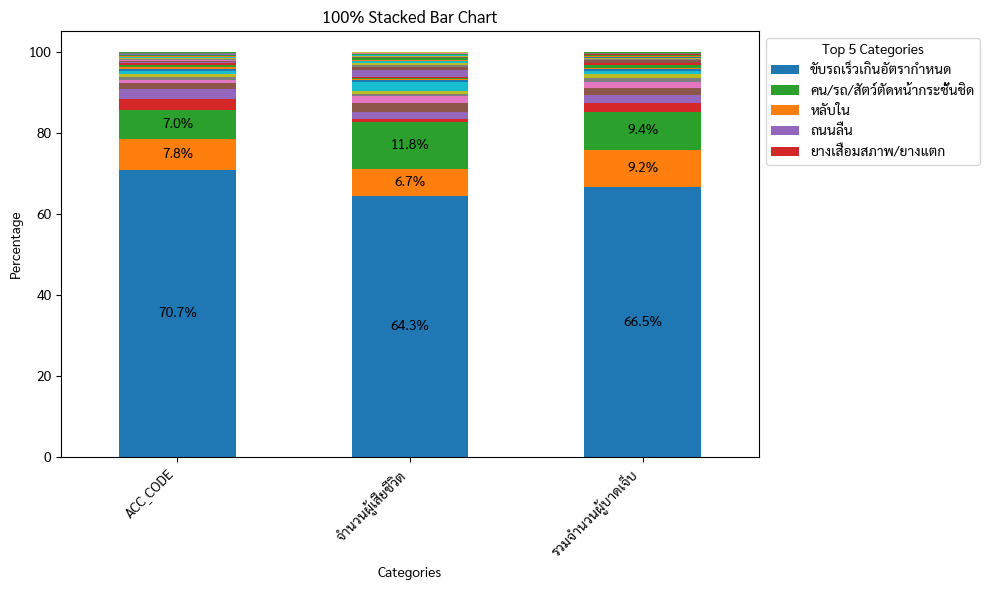

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Transpose the pivot table to have categories as columns
pivot_table_transposed = pivot_table.T

# Calculate percentage values for each category within each group
percentage_values = pivot_table_transposed.div(pivot_table_transposed.sum(axis=1), axis=0) * 100

# Create the 100% stacked bar chart
ax = percentage_values.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart
plt.title('100% Stacked Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Percentage')

# Get handles and labels from the legend
handles, labels = ax.get_legend_handles_labels()

# Sort labels based on total percentage (sum across all groups)
label_order = percentage_values.sum().sort_values(ascending=False).index

# Select the top 5 labels and corresponding handles
top_5_labels = label_order[:5]
top_5_handles = [handles[labels.index(label)] for label in top_5_labels]

# Create a new legend with only the top 5 entries
ax.legend(top_5_handles, top_5_labels, title='Top 5 Categories', loc='upper left', bbox_to_anchor=(1, 1))


# Add percentage labels inside the bars (optional)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height >= 6.5:  # Only label if height is 6.5% or greater
        ax.text(x + width / 2,
                y + height / 2,
                '{:.1f}%'.format(height),
                ha='center', va='center')


plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

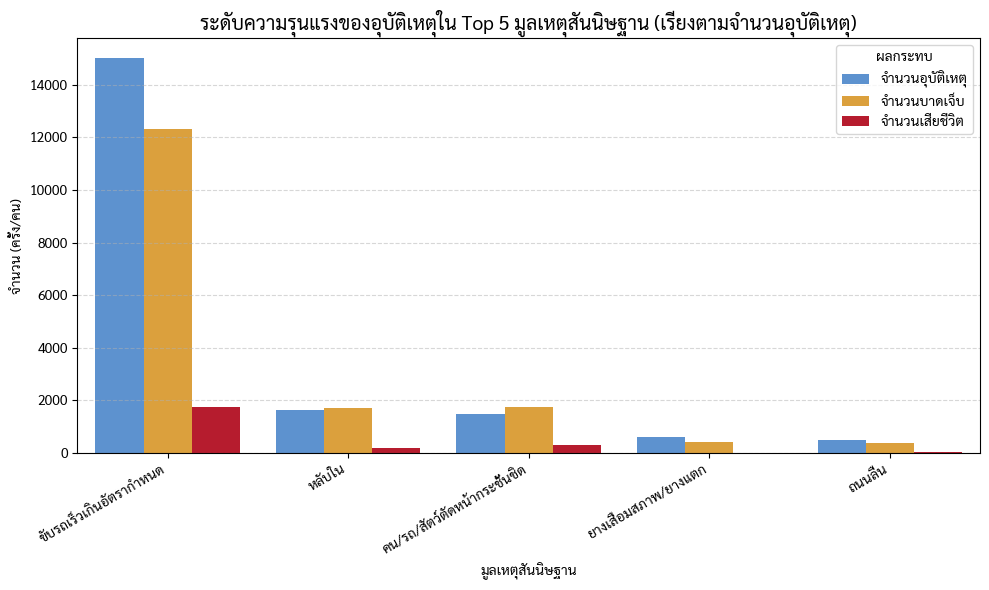

In [ ]:
# รวมจำนวนบาดเจ็บ = บาดเจ็บเล็กน้อย + สาหัส
df["รวมบาดเจ็บ"] = df["จำนวนผู้บาดเจ็บเล็กน้อย"] + df["จำนวนผู้บาดเจ็บสาหัส"]
df["count"] = 1  # ใช้สำหรับนับจำนวนอุบัติเหตุ

# เลือก Top 5 มูลเหตุสันนิษฐาน
top5_causes = df["มูลเหตุสันนิษฐาน"].value_counts().nlargest(5).index.tolist()
df_top5 = df[df["มูลเหตุสันนิษฐาน"].isin(top5_causes)]

# สรุปข้อมูล
summary = df_top5.groupby("มูลเหตุสันนิษฐาน").agg({
    "count": "sum",
    "รวมบาดเจ็บ": "sum",
    "จำนวนผู้เสียชีวิต": "sum"
}).reset_index()

# เรียงลำดับตามจำนวนอุบัติเหตุ
summary_sorted = summary.sort_values(by="count", ascending=False)

# เปลี่ยนชื่อคอลัมน์ให้อ่านง่ายขึ้น
summary_sorted_renamed = summary_sorted.rename(columns={
    "count": "จำนวนอุบัติเหตุ",
    "รวมบาดเจ็บ": "จำนวนบาดเจ็บ",
    "จำนวนผู้เสียชีวิต": "จำนวนเสียชีวิต"
})

# แปลงข้อมูลเป็น long format สำหรับ seaborn
df_melted = pd.melt(
    summary_sorted_renamed,
    id_vars="มูลเหตุสันนิษฐาน",
    value_vars=["จำนวนอุบัติเหตุ", "จำนวนบาดเจ็บ", "จำนวนเสียชีวิต"],
    var_name="ประเภทผลกระทบ",
    value_name="จำนวน"
)

# กำหนดสีให้อ่านง่าย
colors = {
    "จำนวนอุบัติเหตุ": "#4A90E2",   # ฟ้า
    "จำนวนบาดเจ็บ": "#F5A623",   # ส้ม
    "จำนวนเสียชีวิต": "#D0021B"    # แดง
}

# วาดกราฟ
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_melted,
    x="มูลเหตุสันนิษฐาน",
    y="จำนวน",
    hue="ประเภทผลกระทบ",
    palette=colors
)

plt.title("ระดับความรุนแรงของอุบัติเหตุใน Top 5 มูลเหตุสันนิษฐาน (เรียงตามจำนวนอุบัติเหตุ)", fontsize=14)
plt.ylabel("จำนวน (ครั้ง/คน)")
plt.xlabel("มูลเหตุสันนิษฐาน")
plt.xticks(rotation=30, ha='right')
plt.legend(title="ผลกระทบ")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()